In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [9]:
import pandas as pd
train_df = pd.read_csv('SentenceTransformer_train.csv')
val_df = pd.read_csv('SentenceTransformer_val.csv')
test_df = pd.read_csv('SentenceTransformer_test.csv')
columns_to_drop = ['target', 'class_id']
train_df = train_df.drop(columns_to_drop, axis=1)
val_df = val_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
val_df

path class_name  \
0     ../archive/images/apple_pie/1133267.jpg  apple_pie   
1     ../archive/images/apple_pie/1147371.jpg  apple_pie   
2     ../archive/images/apple_pie/1154371.jpg  apple_pie   
3     ../archive/images/apple_pie/1174949.jpg  apple_pie   
4     ../archive/images/apple_pie/1344873.jpg  apple_pie   
...                                       ...        ...   
7570     ../archive/images/waffles/825476.jpg    waffles   
7571     ../archive/images/waffles/869731.jpg    waffles   
7572     ../archive/images/waffles/948659.jpg    waffles   
7573     ../archive/images/waffles/950926.jpg    waffles   
7574     ../archive/images/waffles/957965.jpg    waffles   

                                            ingredients  \
0     ['butter', 'flour', 'sugar', 'brown sugar', 'a...   
1     ['butter', 'flour', 'sugar', 'brown sugar', 'a...   
2     ['butter', 'flour', 'sugar', 'brown sugar', 'a...   
3     ['butter', 'flour', 'sugar', 'brown sugar', 'a...   
4     ['butter', 'flour', 'sugar', 'brown sugar', 'a...   
...                                                 ...   
7570  ['egg', 'salt', 'sugar', 'vanilla', 'butter', ...   
7571  ['egg', 'salt', 'sugar', 'vanilla', 'butter', ...   
7572  ['egg', 'salt', 'sugar', 'vanilla', 'butter', ...   
7573  ['egg', 'salt', 'sugar', 'vanilla', 'butter', ...   
7574  ['egg', 'salt', 'sugar', 'vanilla', 'butter', ...   

                                              allergies  Nut Allergy  \
0     ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
1     ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
2     ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
3     ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
4     ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
...                                                 ...          ...   
7570  ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
7571  ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
7572  ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
7573  ['Milk allergy / Lactose intolerance', 'Sugar ...            0   
7574  ['Milk allergy / Lactose intolerance', 'Sugar ...            0   

      Oral Allergy Syndrome  Stone Fruit Allergy  Allium Allergy  \
0                         1                    0               0   
1                         1                    0               0   
2                         1                    0               0   
3                         1                    0               0   
4                         1                    0               0   
...                     ...                  ...             ...   
7570                      0                    0               0   
7571                      0                    0               0   
7572                      0                    0               0   
7573                      0                    0               0   
7574                      0                    0               0   

      Histamine Allergy  Legume Allergy  ...  Nightshade Allergy  \
0                     0               0  ...                   0   
1                     0               0  ...                   0   
2                     0               0  ...                   0   
3                     0               0  ...                   0   
4                     0               0  ...                   0   
...                 ...             ...  ...                 ...   
7570                  0               0  ...                   0   
7571                  0               0  ...                   0   
7572                  0               0  ...                   0   
7573                  0               0  ...                   0   
7574                  0               0  ...                   0   

      Sugar Allergy / Intolerance  LTP Allergy  Citrus Allergy  Honey Allergy  \
0                              

In [10]:
val_df.columns[4:]

Index(['Nut Allergy', 'Oral Allergy Syndrome', 'Stone Fruit Allergy',
       'Allium Allergy', 'Histamine Allergy', 'Legume Allergy',
       'Salicylate Allergy', 'Cruciferous Allergy',
       'Milk allergy / Lactose intolerance', 'Mushroom Allergy',
       'Hypersensitivity', 'Poultry Allergy', 'Fish Allergy',
       'Nightshade Allergy', 'Sugar Allergy / Intolerance', 'LTP Allergy',
       'Citrus Allergy', 'Honey Allergy', 'Potato Allergy',
       'Lactose Intolerance', 'Mint Allergy', 'Rice Allergy', 'Soy Allergy'],
      dtype='object')

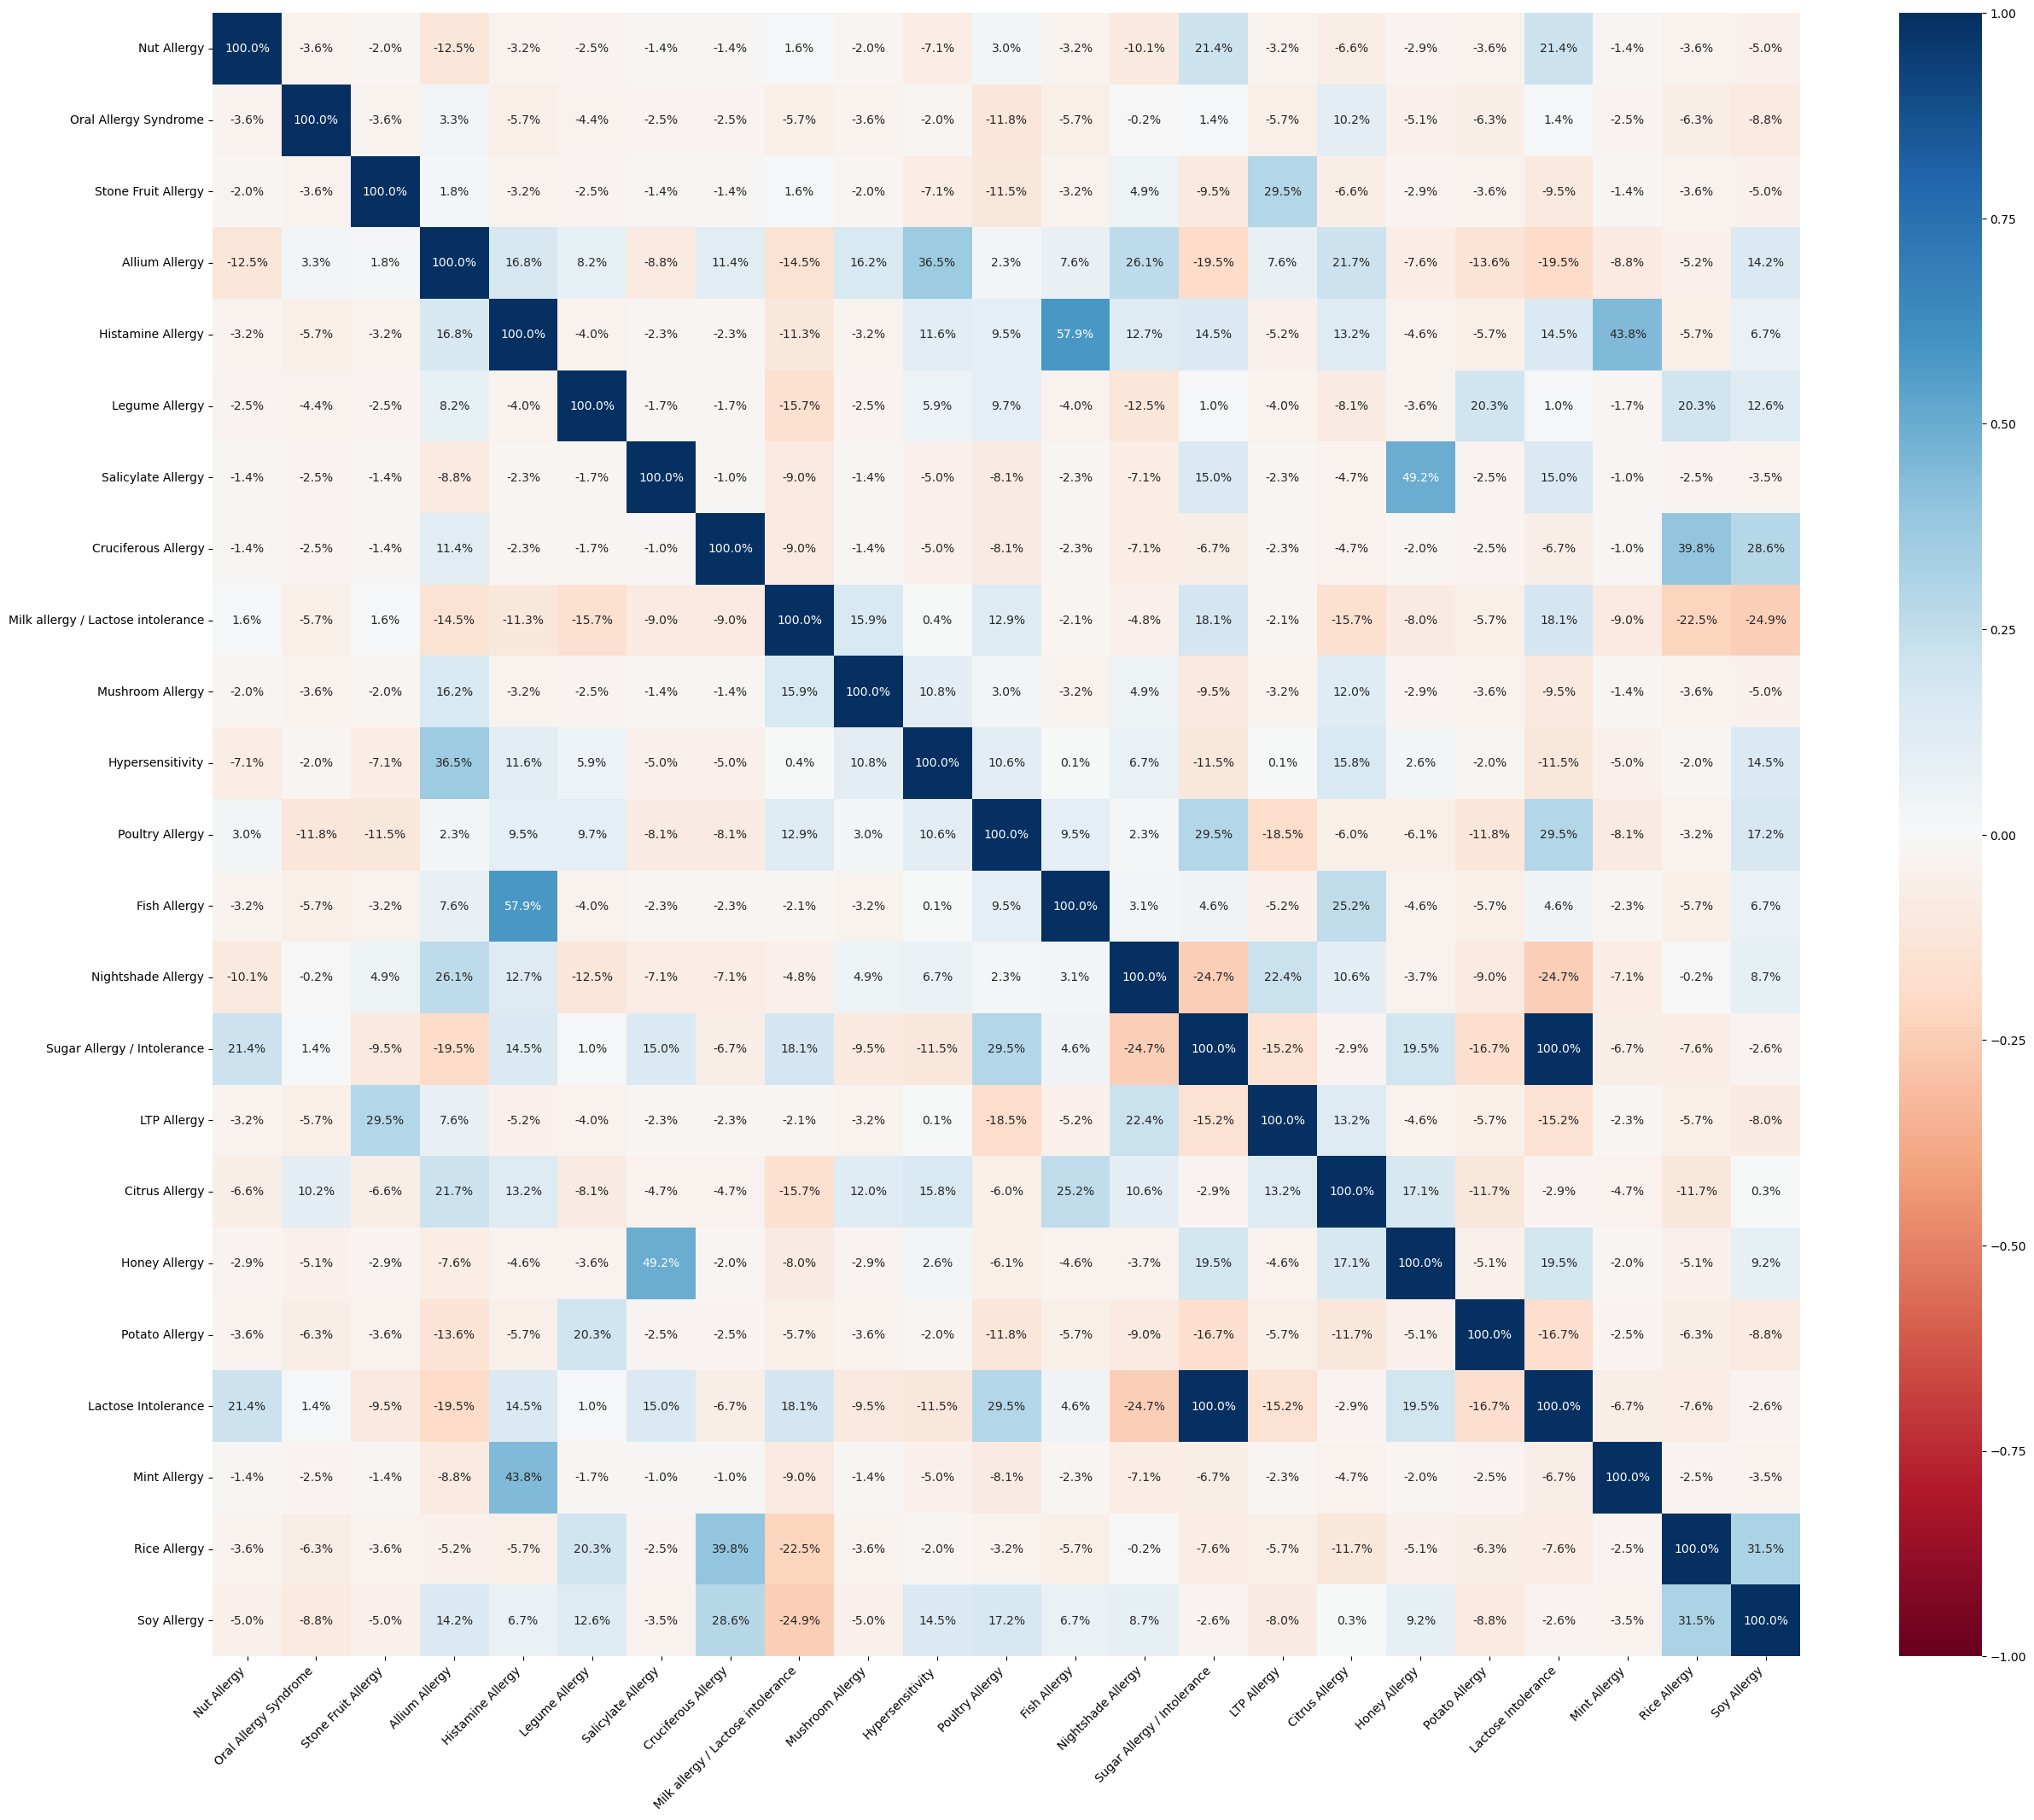

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
allergies = train_df.columns[4:]
mapped_data = train_df[allergies].apply(lambda x: x.map(lambda val: 1 if val > 0 else 0)).values
mapped_data = mapped_data.T
co_all = np.corrcoef(mapped_data)

fig, ax1 = plt.subplots(1, 1, figsize=(30, 25))
heatmap = sns.heatmap(co_all, annot=True, fmt='2.1%', ax=ax1, cmap='RdBu', vmin=-1, vmax=1)

ax1.set_xticklabels(allergies, rotation=45, ha='right')
ax1.set_yticklabels(allergies, rotation=0, ha='right')
plt.show()


# Manual Upsample

In [4]:
# column_sums = train_df[train_df.columns[6:]].sum()
# sorted_columns = column_sums.sort_values(ascending=True).index
# alleg_df = train_df[train_df.columns[:6].tolist() + sorted_columns.tolist()]


# columns_to_move = ["Cruciferous Allergy", "Mushroom Allergy", "Stone Fruit Allergy"]
# remaining_columns = [col for col in alleg_df.columns if col not in columns_to_move]
# desired_column_order = remaining_columns[:6] + columns_to_move + remaining_columns[6:]
# alleg_df = alleg_df[desired_column_order]

# columns_to_move = ["Lactose Intolerance"]
# remaining_columns = [col for col in alleg_df.columns if col not in columns_to_move]
# desired_column_order = remaining_columns[:-1] + columns_to_move + remaining_columns[-1:]
# alleg_df = alleg_df[desired_column_order]

# labels = alleg_df.columns[6:]
# label_counts = alleg_df[labels].sum()
# plt.figure(figsize=(12, 6))
# label_counts.plot(kind='bar', color='skyblue')
# plt.title('Label Distribution')
# plt.xlabel('Labels')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()
# print(label_counts)

In [5]:
# from sklearn.utils import resample
# selected_columns = alleg_df.columns[6:-6]
# other_df = alleg_df[(alleg_df[selected_columns] == 1).all(axis=1)]
# oversample_df = alleg_df[(alleg_df[selected_columns] == 0).any(axis=1)]

# selected_columns = alleg_df.columns[6:-6]
# temp_df = pd.DataFrame(columns=alleg_df.columns)
# upsampled = []
# skip_label = []
# for k in selected_columns:
#     df = oversample_df[oversample_df[k] == 1]
#     total_count = df[k].sum()

#     removed_sample = total_count + temp_df[k].sum() + other_df[k].sum()
#     original_threshold = 30000
#     threshold = original_threshold-removed_sample
#     # print(k, total_count, temp_df[k].sum(), removed_sample, threshold)
#     if not df.empty and threshold > 0:
#         fraud_upsampled = resample(df[df[k] == 1],
#                                    replace=True,
#                                    n_samples=10000,
#                                    random_state=27)
#         fraud_upsampled = pd.DataFrame(fraud_upsampled, columns=df.columns)
#         temp_df = pd.concat([temp_df, fraud_upsampled])
#         issue_column = []
#         for i in temp_df.columns[6:]:
#             label_counts_df1 = temp_df[i].sum()
#             label_counts_df2 = other_df[i].sum()
#             if label_counts_df1 + label_counts_df2 >= original_threshold:
#                 issue_column.append(i)
#         if len(issue_column) > 0:
#             fraud_upsampled = resample(df[df[k].eq(1)],
#                                         replace=True,
#                                         n_samples=10000,
#                                         random_state=27)
#             fraud_upsampled = pd.DataFrame(fraud_upsampled, columns=df.columns)
                
#             temp_df = pd.concat([temp_df, fraud_upsampled])
#             label_counts = temp_df[temp_df.columns[6:]].sum()
#             check_label = label_counts[label_counts >= 30000]
#             check_column = []
#             for i in check_label.index.tolist():
#                 if i not in skip_label:
#                     check_column.append(i)
#                     skip_label.append(i)
#             if len(check_column) < 5:
#                 print(k, check_column)
#                 upsampled.append(fraud_upsampled)
#                 # df_when_col3_is_0 = df_when_col3_is_0[(df_when_col3_is_0[issue_column] == 0).any(axis=1)]
#         else:
#             upsampled.append(fraud_upsampled)
#         issue_column=[]
#         oversample_df = oversample_df[oversample_df[k] == 0]
# upsampled_df = pd.concat([other_df] + upsampled)

# labels = upsampled_df.columns[6:]
# label_counts = upsampled_df[labels].sum()
# plt.figure(figsize=(12, 6))
# label_counts.plot(kind='bar', color='skyblue')
# plt.title('Label Distribution')
# plt.xlabel('Labels')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.show()
# print(label_counts)
# print(label_counts.max())

In [6]:
# upsampled_df.columns[8:-1]

# Resample All < 30000

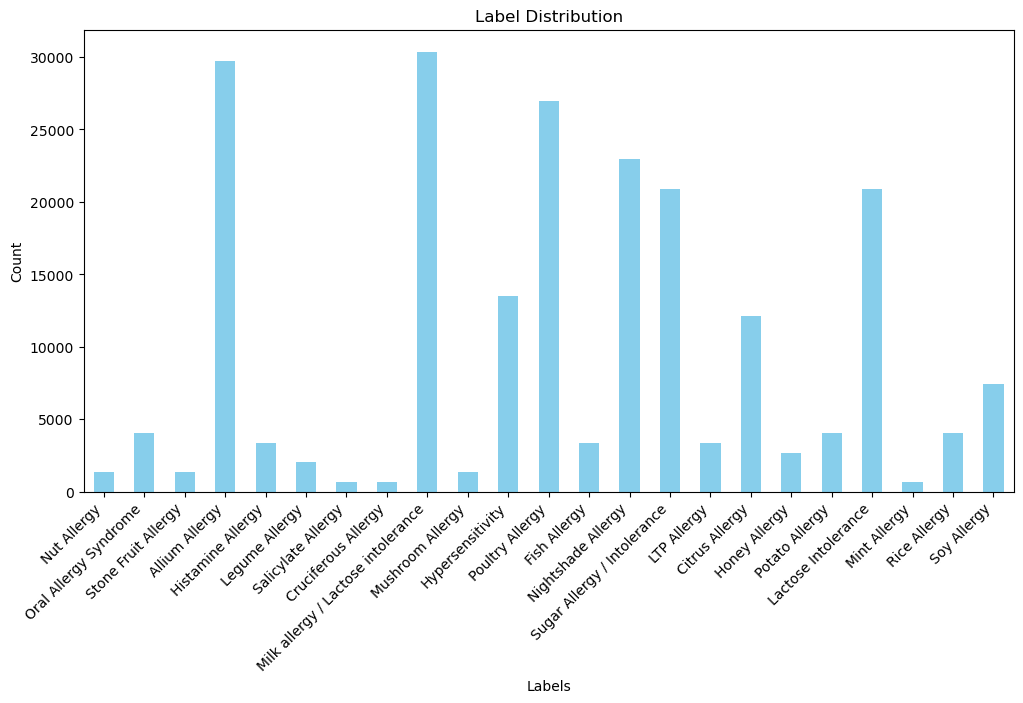

Nut Allergy                            1350
Oral Allergy Syndrome                  4050
Stone Fruit Allergy                    1350
Allium Allergy                        29700
Histamine Allergy                      3375
Legume Allergy                         2025
Salicylate Allergy                      675
Cruciferous Allergy                     675
Milk allergy / Lactose intolerance    30375
Mushroom Allergy                       1350
Hypersensitivity                      13500
Poultry Allergy                       27000
Fish Allergy                           3375
Nightshade Allergy                    22950
Sugar Allergy / Intolerance           20925
LTP Allergy                            3375
Citrus Allergy                        12150
Honey Allergy                          2700
Potato Allergy                         4050
Lactose Intolerance                   20925
Mint Allergy                            675
Rice Allergy                           4050
Soy Allergy                     

In [11]:
labels = train_df.columns[4:]
label_counts = train_df[labels].sum()
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
print(label_counts)
print(label_counts.max())

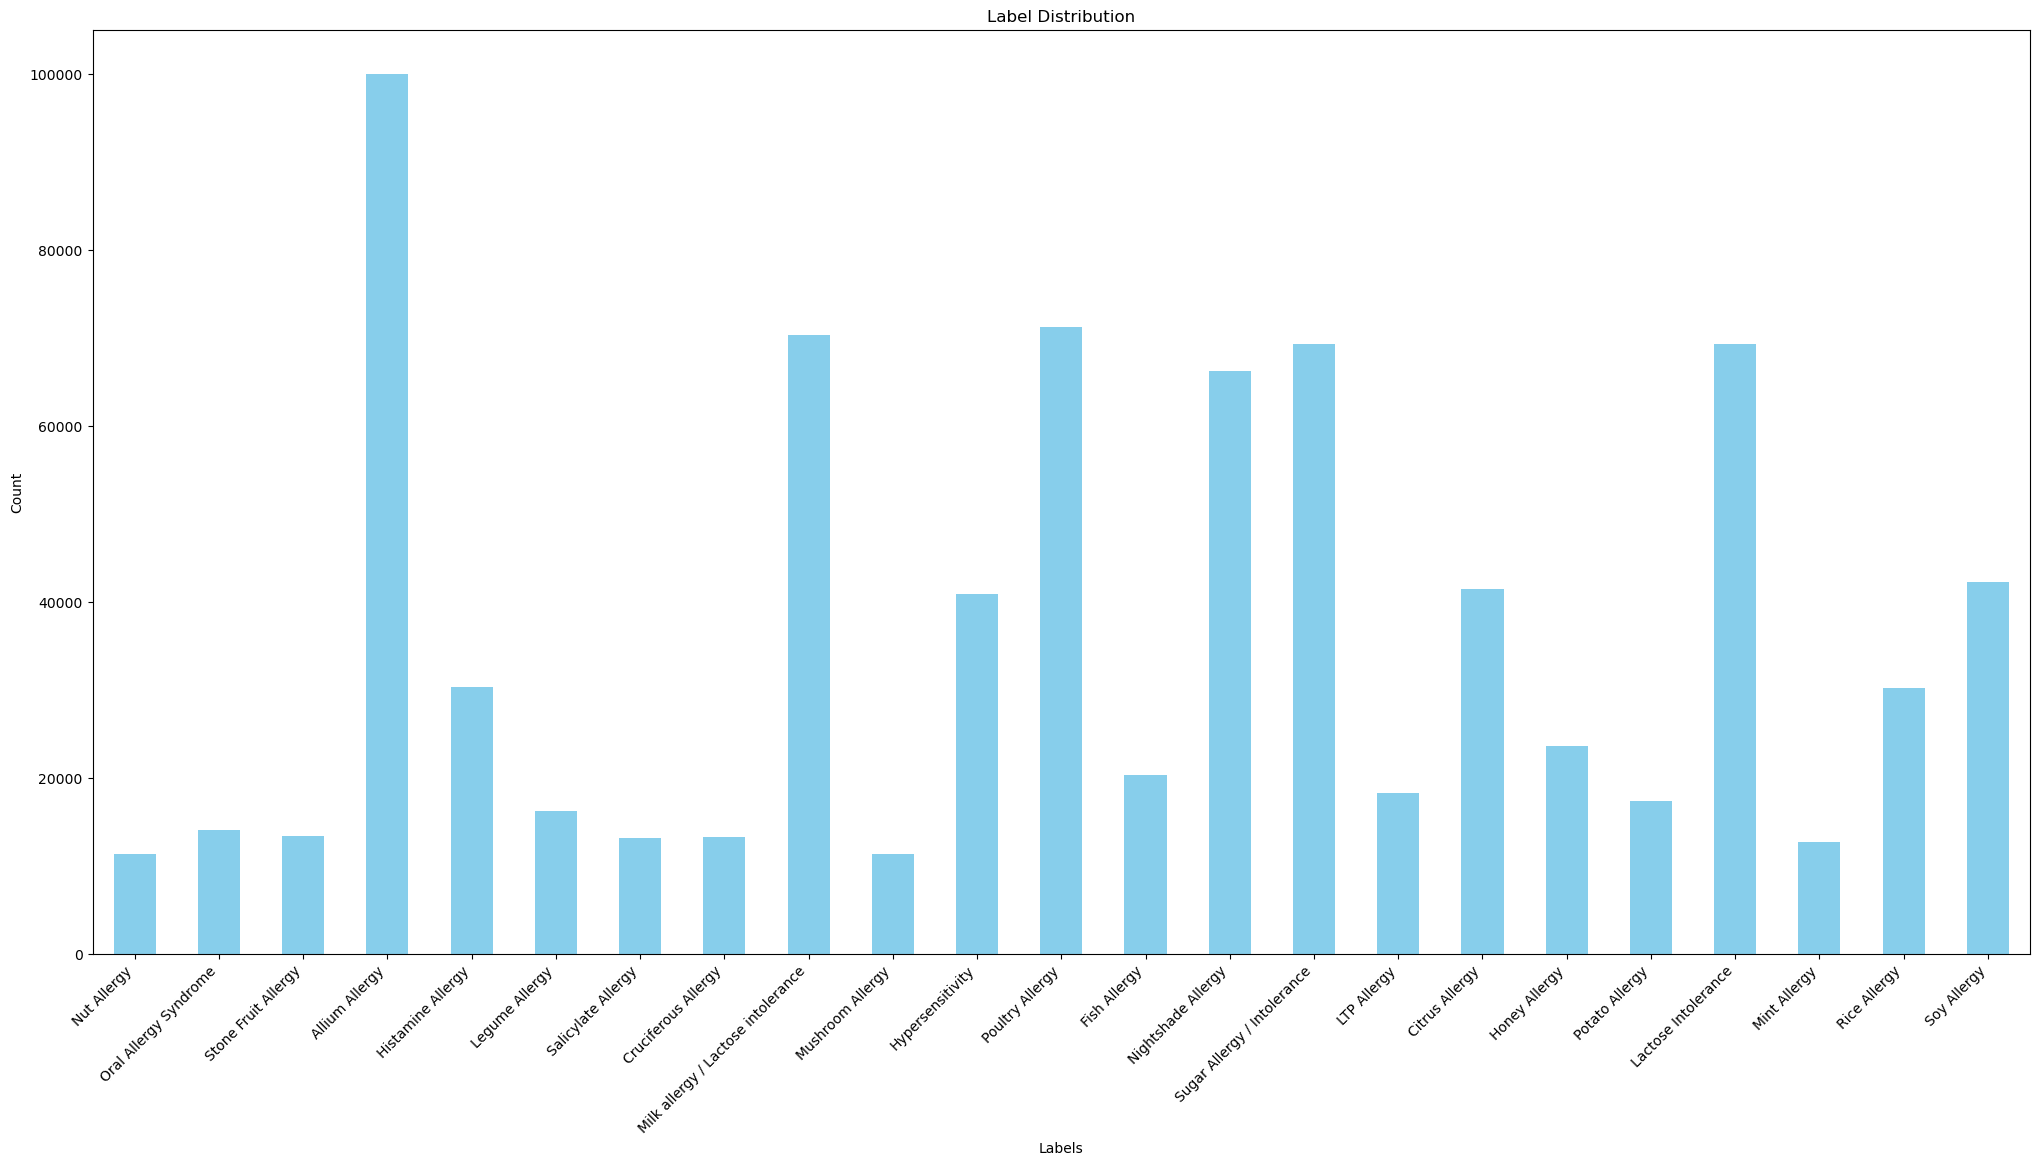

Nut Allergy                            11350
Oral Allergy Syndrome                  14050
Stone Fruit Allergy                    13356
Allium Allergy                        100030
Histamine Allergy                      30281
Legume Allergy                         16189
Salicylate Allergy                     13120
Cruciferous Allergy                    13299
Milk allergy / Lactose intolerance     70357
Mushroom Allergy                       11350
Hypersensitivity                       40926
Poultry Allergy                        71230
Fish Allergy                           20299
Nightshade Allergy                     66237
Sugar Allergy / Intolerance            69336
LTP Allergy                            18273
Citrus Allergy                         41423
Honey Allergy                          23588
Potato Allergy                         17404
Lactose Intolerance                    69336
Mint Allergy                           12644
Rice Allergy                           30207
Soy Allerg

In [15]:
from sklearn.utils import resample
import pandas as pd
labels = train_df.columns[4:]
label_counts = train_df[labels].sum()
threshold = 10000
labels_to_upsample = label_counts[label_counts < threshold].index.tolist()

upsampled_dataframes = []

resample_train_df = pd.DataFrame(columns=train_df.columns)
for k in labels_to_upsample:
    label_data = train_df[train_df[k] == 1]
    upsampled_label_data = resample(label_data, replace=True, n_samples=threshold, random_state=42)
    upsampled_dataframes.append(upsampled_label_data)

resample_train_df = pd.concat([train_df] + upsampled_dataframes, ignore_index=True)

labels = resample_train_df.columns[4:]
label_counts = resample_train_df[labels].sum()
plt.figure(figsize=(25, 12))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
print(label_counts)

# Preprocessing data

In [19]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch
import imgaug.augmenters as iaa
import numpy as np

image_size = (224, 224)

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None, augmentation=None):
        self.dataframe = dataframe
        self.transform = transform
        self.augmentation = augmentation

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        image = Image.open(img_name)
        label = torch.Tensor(self.dataframe.iloc[idx, 4:].values.astype(float))

        if image.mode != "RGB":
            image = image.convert("RGB")

        if self.augmentation:
            image_np = np.array(image)
            augmented_image_np = self.augmentation(images=[image_np])[0]
            image = Image.fromarray(augmented_image_np)

        if self.transform:
            image = self.transform(image)

        image = torch.Tensor(image)
        label = torch.Tensor(label)

        return image, label

augmentation = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Crop(percent=(0, 0.2)),
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),
    iaa.ContrastNormalization((0.75, 1.5)),
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    iaa.Affine(rotate=(-45, 45)),
])

train_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=(0.7, 1.3)),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=0.01, scale=(0.9, 1.25))
])

test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

train_dataset = CustomDataset(dataframe=resample_train_df, transform=train_transform, augmentation=augmentation)
val_dataset = CustomDataset(dataframe=val_df, transform=test_transform)
test_dataset = CustomDataset(dataframe=test_df, transform=test_transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


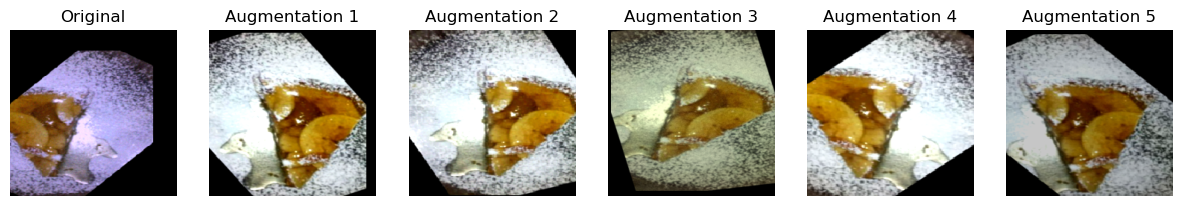

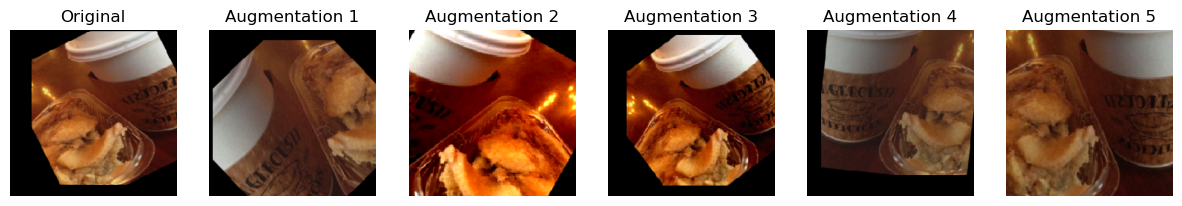

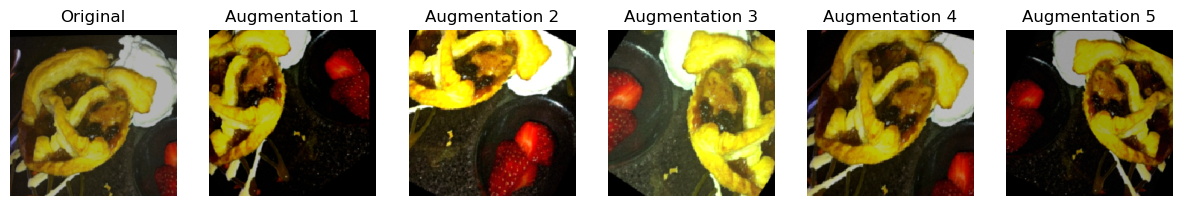

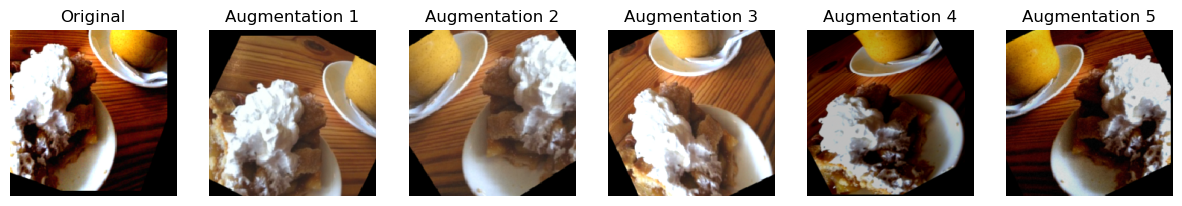

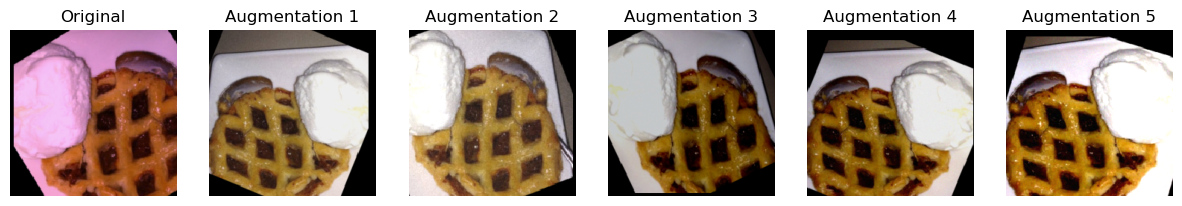

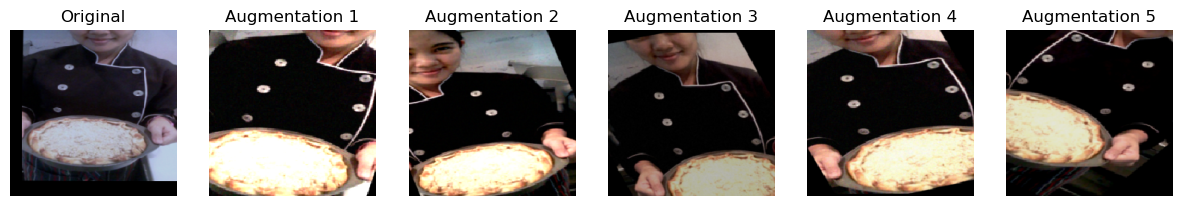

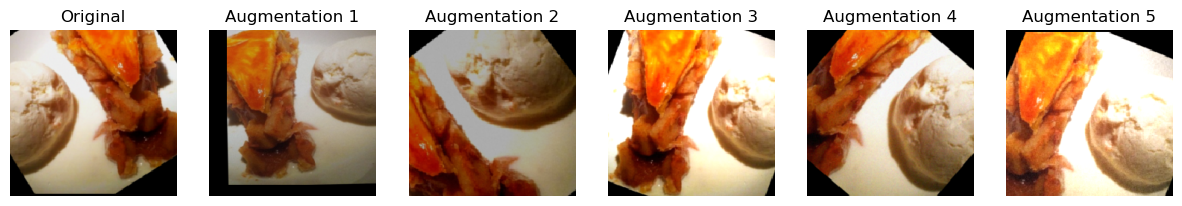

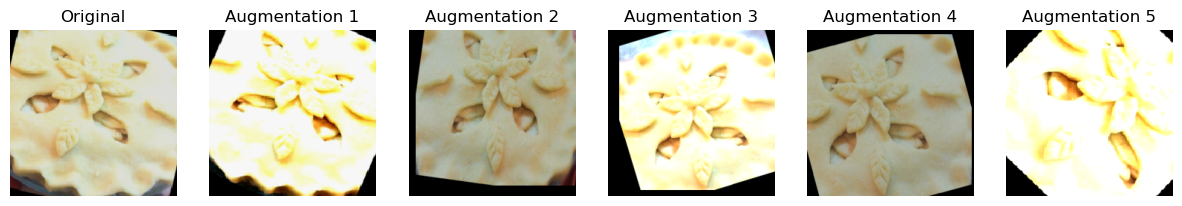

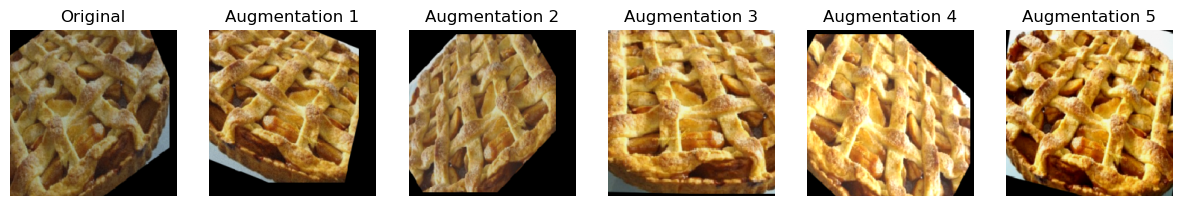

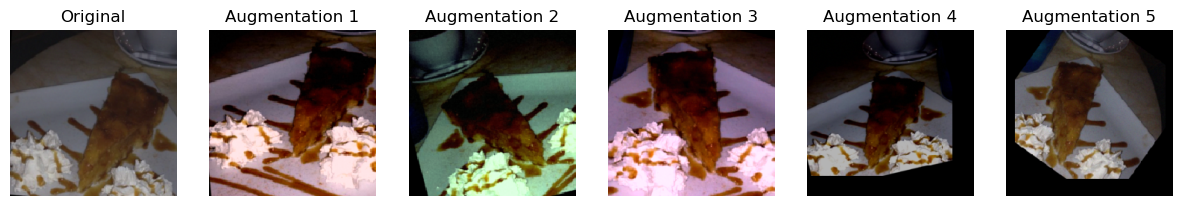

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def show_augmentations(dataset, original_idx=0, num_augmentations=5):
    original_img, _ = dataset[original_idx]

    fig, axes = plt.subplots(1, num_augmentations + 1, figsize=(15, 3))

    # Display the original image
    axes[0].imshow(np.transpose(original_img.numpy(), (1, 2, 0)))
    axes[0].axis('off')
    axes[0].set_title('Original')

    # Display augmentations of the same image
    for i in range(1, num_augmentations + 1):
        augmented_img, _ = dataset[original_idx]
        axes[i].imshow(np.transpose(augmented_img.numpy(), (1, 2, 0)))
        axes[i].axis('off')
        axes[i].set_title(f'Augmentation {i}')

    plt.show()
for i in range(10):
    show_augmentations(train_dataset, original_idx=i, num_augmentations=5)


In [21]:
len(resample_train_df.columns[4:])

23

In [33]:
import torch
import torch.nn as nn
import torchvision.models as models

class FineTunedResNet(nn.Module):
    def __init__(self, num_classes=len(allergies)):
        super(FineTunedResNet, self).__init__()
        resnet = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-1])
        self.fc = nn.Linear(resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

def Model():
    return FineTunedResNet()

model = Model()
model.to(mps_device)

/Users/mac/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FineTunedResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [22]:
# import torch.nn as nn
# import torch.nn.functional as F
# import torchvision.models as models
# allergies = resample_train_df.columns[4:]
# class FineTunedResNet(nn.Module):
#     def __init__(self, num_classes=len(allergies)):
#         super(FineTunedResNet, self).__init__()
#         resnet = models.resnet18(pretrained=True)
#         self.features = nn.Sequential(*list(resnet.children())[:-2])
#         self.conv1x1 = nn.Conv2d(resnet.fc.in_features, 512, kernel_size=1)
#         self.bn1 = nn.BatchNorm2d(512)
#         self.dropout = nn.Dropout(0.3)
#         self.bottleneck = nn.Sequential(
#             nn.Conv2d(512, 256, kernel_size=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 512, kernel_size=1),
#             nn.BatchNorm2d(512),
#         )
#         self.dropout2 = nn.Dropout(0.3)
#         self.fc = nn.Linear(512, num_classes)

#     def forward(self, x):
#         x = self.features(x)
#         x = F.adaptive_avg_pool2d(x, (1, 1))
#         x = self.conv1x1(x)
#         x = self.bn1(x)
#         x = F.relu(x, inplace=True)
#         x = self.dropout(x)
#         x = self.bottleneck(x)
#         x = self.dropout(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc(x)
#         return x

# def Model():
#     return FineTunedResNet()

# model = Model()
# model.to(mps_device)

/Users/mac/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FineTunedResNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [23]:
import tqdm
import tqdm.notebook as tqdm
from torch.nn.utils import clip_grad_norm_
def train_loop(train_loader, criterion, optimizer, train_loss, correct_train, total_train):
    for images, targets in tqdm.tqdm(train_loader, desc='Training'):
        images, targets = images.to(mps_device), targets.to(mps_device)
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, targets)
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        train_loss += loss.item()

        total_batch = (targets.size(0) * targets.size(1))
        total_train += total_batch

        predicted_label = torch.sigmoid(outputs)>=0.5
        target_data = (targets==1.0)
        correct = torch.sum((predicted_label == target_data.to(mps_device)).to(torch.float)).item()
        correct_train += correct
    return train_loss, correct_train, total_train

def evaluate(val_loader, criterion, optimizer, val_loss, correct_val, total_val):
    model.eval()
    with torch.no_grad():
        for images, targets in val_loader:
            images, targets = images.to(mps_device), targets.to(mps_device)
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

            total_batch = (targets.size(0) * targets.size(1))
            total_val += total_batch

            predicted_label = torch.sigmoid(outputs)>=0.5
            target_data = (targets==1.0)
            correct = torch.sum((predicted_label == target_data.to(mps_device)).to(torch.float)).item()
            correct_val += correct
    return val_loss, correct_val, total_val

In [34]:
import time
from PIL import Image
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
def train_ingredient_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_val_loss = float('inf')
    patience = 7
    no_improvement = 0
    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        val_loss = 0.0
        correct_val = 0
        total_val = 0

        train_loss, correct_train, total_train = train_loop(train_loader, criterion, optimizer, train_loss, correct_train, total_train)
        avg_train_loss = train_loss / len(train_loader)
        train_accuracy = (correct_train / total_train) * 100.0
        train_accuracies.append(train_accuracy)
        train_losses.append(avg_train_loss)

        val_loss, correct_val, total_val = evaluate(val_loader, criterion, optimizer, val_loss, correct_val, total_val)

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = (correct_val / total_val) * 100.0
        val_accuracies.append(val_accuracy)
        val_losses.append(avg_val_loss)
        lr_scheduler.step(avg_val_loss)

        end_time = time.time()
        epoch_time = end_time - start_time

        print(f"Epoch [{epoch+1}/{num_epochs}] - Time: {epoch_time:.2f} seconds\n"
            f"Train Accuracy: {train_accuracy:.2f}% - Train Loss: {avg_train_loss:.4f}\n"
            f"Validation Accuracy: {val_accuracy:.2f}% - Validation Loss: {avg_val_loss:.4f}")
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement == patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

In [13]:
# labels = torch.tensor(train_df.iloc[:, 6:].values, dtype=torch.float32)
# class_frequencies = labels.sum(dim=0)

# total_samples = len(labels)
# class_weights = total_samples / (len(class_frequencies) * class_frequencies)

# class_weight_tensor = torch.tensor(class_weights, dtype=torch.float32).to(mps_device)

# criterion = nn.BCEWithLogitsLoss(weight=class_weight_tensor)
# optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
# lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
# train_ingredient_model(model, train_loader, val_loader, criterion, optimizer, 30)

In [35]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)
train_ingredient_model(model, train_loader, val_loader, criterion, optimizer, 30)

Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [1/30] - Time: 4002.38 seconds
Train Accuracy: 92.10% - Train Loss: 0.1912
Validation Accuracy: 91.01% - Validation Loss: 0.2228


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [2/30] - Time: 3825.49 seconds
Train Accuracy: 94.51% - Train Loss: 0.1364
Validation Accuracy: 92.08% - Validation Loss: 0.1983


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [3/30] - Time: 3837.07 seconds
Train Accuracy: 95.47% - Train Loss: 0.1134
Validation Accuracy: 93.06% - Validation Loss: 0.1757


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [4/30] - Time: 3826.21 seconds
Train Accuracy: 96.11% - Train Loss: 0.0982
Validation Accuracy: 93.18% - Validation Loss: 0.1704


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [5/30] - Time: 14318.15 seconds
Train Accuracy: 96.57% - Train Loss: 0.0872
Validation Accuracy: 93.44% - Validation Loss: 0.1748


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [6/30] - Time: 28166.06 seconds
Train Accuracy: 96.93% - Train Loss: 0.0787
Validation Accuracy: 93.46% - Validation Loss: 0.1784


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [7/30] - Time: 8538.84 seconds
Train Accuracy: 97.18% - Train Loss: 0.0723
Validation Accuracy: 93.58% - Validation Loss: 0.1790


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [8/30] - Time: 3888.24 seconds
Train Accuracy: 97.41% - Train Loss: 0.0666
Validation Accuracy: 93.71% - Validation Loss: 0.1739


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [9/30] - Time: 13674.99 seconds
Train Accuracy: 97.58% - Train Loss: 0.0626
Validation Accuracy: 93.87% - Validation Loss: 0.1691


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [10/30] - Time: 4936.74 seconds
Train Accuracy: 97.74% - Train Loss: 0.0586
Validation Accuracy: 93.98% - Validation Loss: 0.1712


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [11/30] - Time: 4131.71 seconds
Train Accuracy: 97.87% - Train Loss: 0.0552
Validation Accuracy: 94.13% - Validation Loss: 0.1759


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [12/30] - Time: 4147.53 seconds
Train Accuracy: 97.98% - Train Loss: 0.0525
Validation Accuracy: 94.21% - Validation Loss: 0.1703


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [13/30] - Time: 4232.72 seconds
Train Accuracy: 98.09% - Train Loss: 0.0498
Validation Accuracy: 94.19% - Validation Loss: 0.1695


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [14/30] - Time: 21684.70 seconds
Train Accuracy: 98.16% - Train Loss: 0.0477
Validation Accuracy: 94.29% - Validation Loss: 0.1735


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch 00015: reducing learning rate of group 0 to 3.0000e-05.
Epoch [15/30] - Time: 21099.79 seconds
Train Accuracy: 98.25% - Train Loss: 0.0457
Validation Accuracy: 94.26% - Validation Loss: 0.1729


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [16/30] - Time: 5001.71 seconds
Train Accuracy: 98.76% - Train Loss: 0.0323
Validation Accuracy: 94.96% - Validation Loss: 0.1557


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [17/30] - Time: 4337.55 seconds
Train Accuracy: 98.93% - Train Loss: 0.0278
Validation Accuracy: 94.99% - Validation Loss: 0.1588


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [18/30] - Time: 4397.94 seconds
Train Accuracy: 99.00% - Train Loss: 0.0261
Validation Accuracy: 95.05% - Validation Loss: 0.1579


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [19/30] - Time: 3907.20 seconds
Train Accuracy: 99.05% - Train Loss: 0.0248
Validation Accuracy: 95.11% - Validation Loss: 0.1567


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [20/30] - Time: 3971.45 seconds
Train Accuracy: 99.08% - Train Loss: 0.0239
Validation Accuracy: 95.06% - Validation Loss: 0.1579


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [21/30] - Time: 4002.32 seconds
Train Accuracy: 99.11% - Train Loss: 0.0231
Validation Accuracy: 95.11% - Validation Loss: 0.1581


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch 00022: reducing learning rate of group 0 to 3.0000e-06.
Epoch [22/30] - Time: 3943.58 seconds
Train Accuracy: 99.13% - Train Loss: 0.0225
Validation Accuracy: 95.11% - Validation Loss: 0.1620


Training:   0%|          | 0/3409 [00:00<?, ?it/s]

Epoch [23/30] - Time: 4548.55 seconds
Train Accuracy: 99.18% - Train Loss: 0.0215
Validation Accuracy: 95.14% - Validation Loss: 0.1606
Early stopping at epoch 23


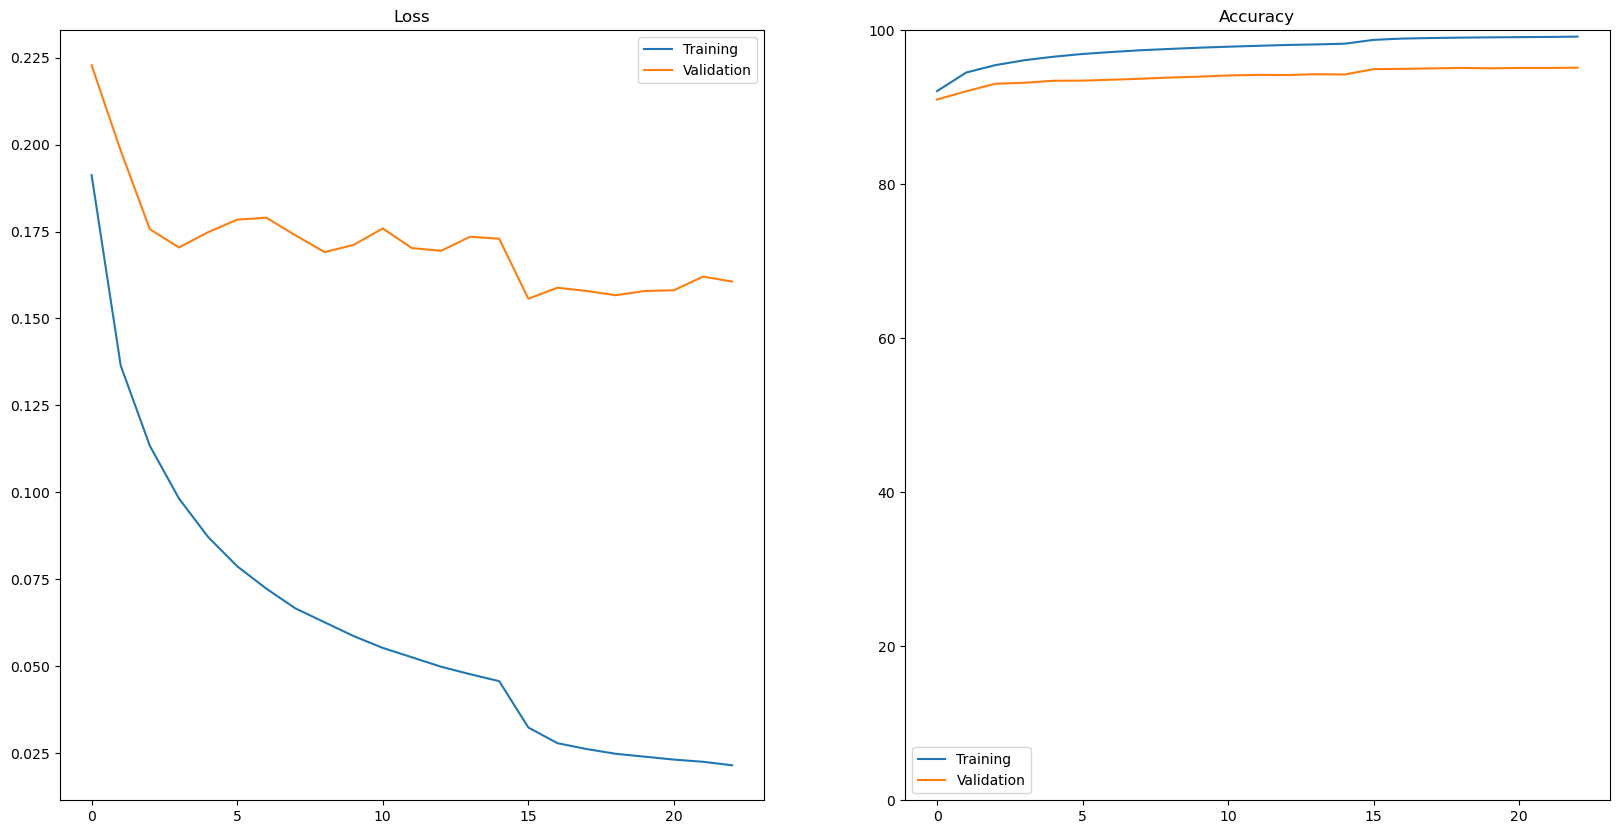

In [36]:
import matplotlib.pyplot as plt
import pickle
loss_history = {'train_losses': train_losses, 'val_losses': val_losses}
with open('./resamplesk_ingredients101/allergies/FineTunedResNet_allergies_history.pkl', 'wb') as file:
    pickle.dump(loss_history, file)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(train_losses, label='Training') 
ax1.plot(val_losses, label='Validation')
ax1.legend()
ax1.set_title('Loss')

ax2.plot(train_accuracies, label='Training')
ax2.plot(val_accuracies, label='Validation') 
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_ylim(0, 100)
fig.savefig('./resamplesk_ingredients101/allergies/FineTunedResNet_allergies_loss_accuracy.png')
plt.show()

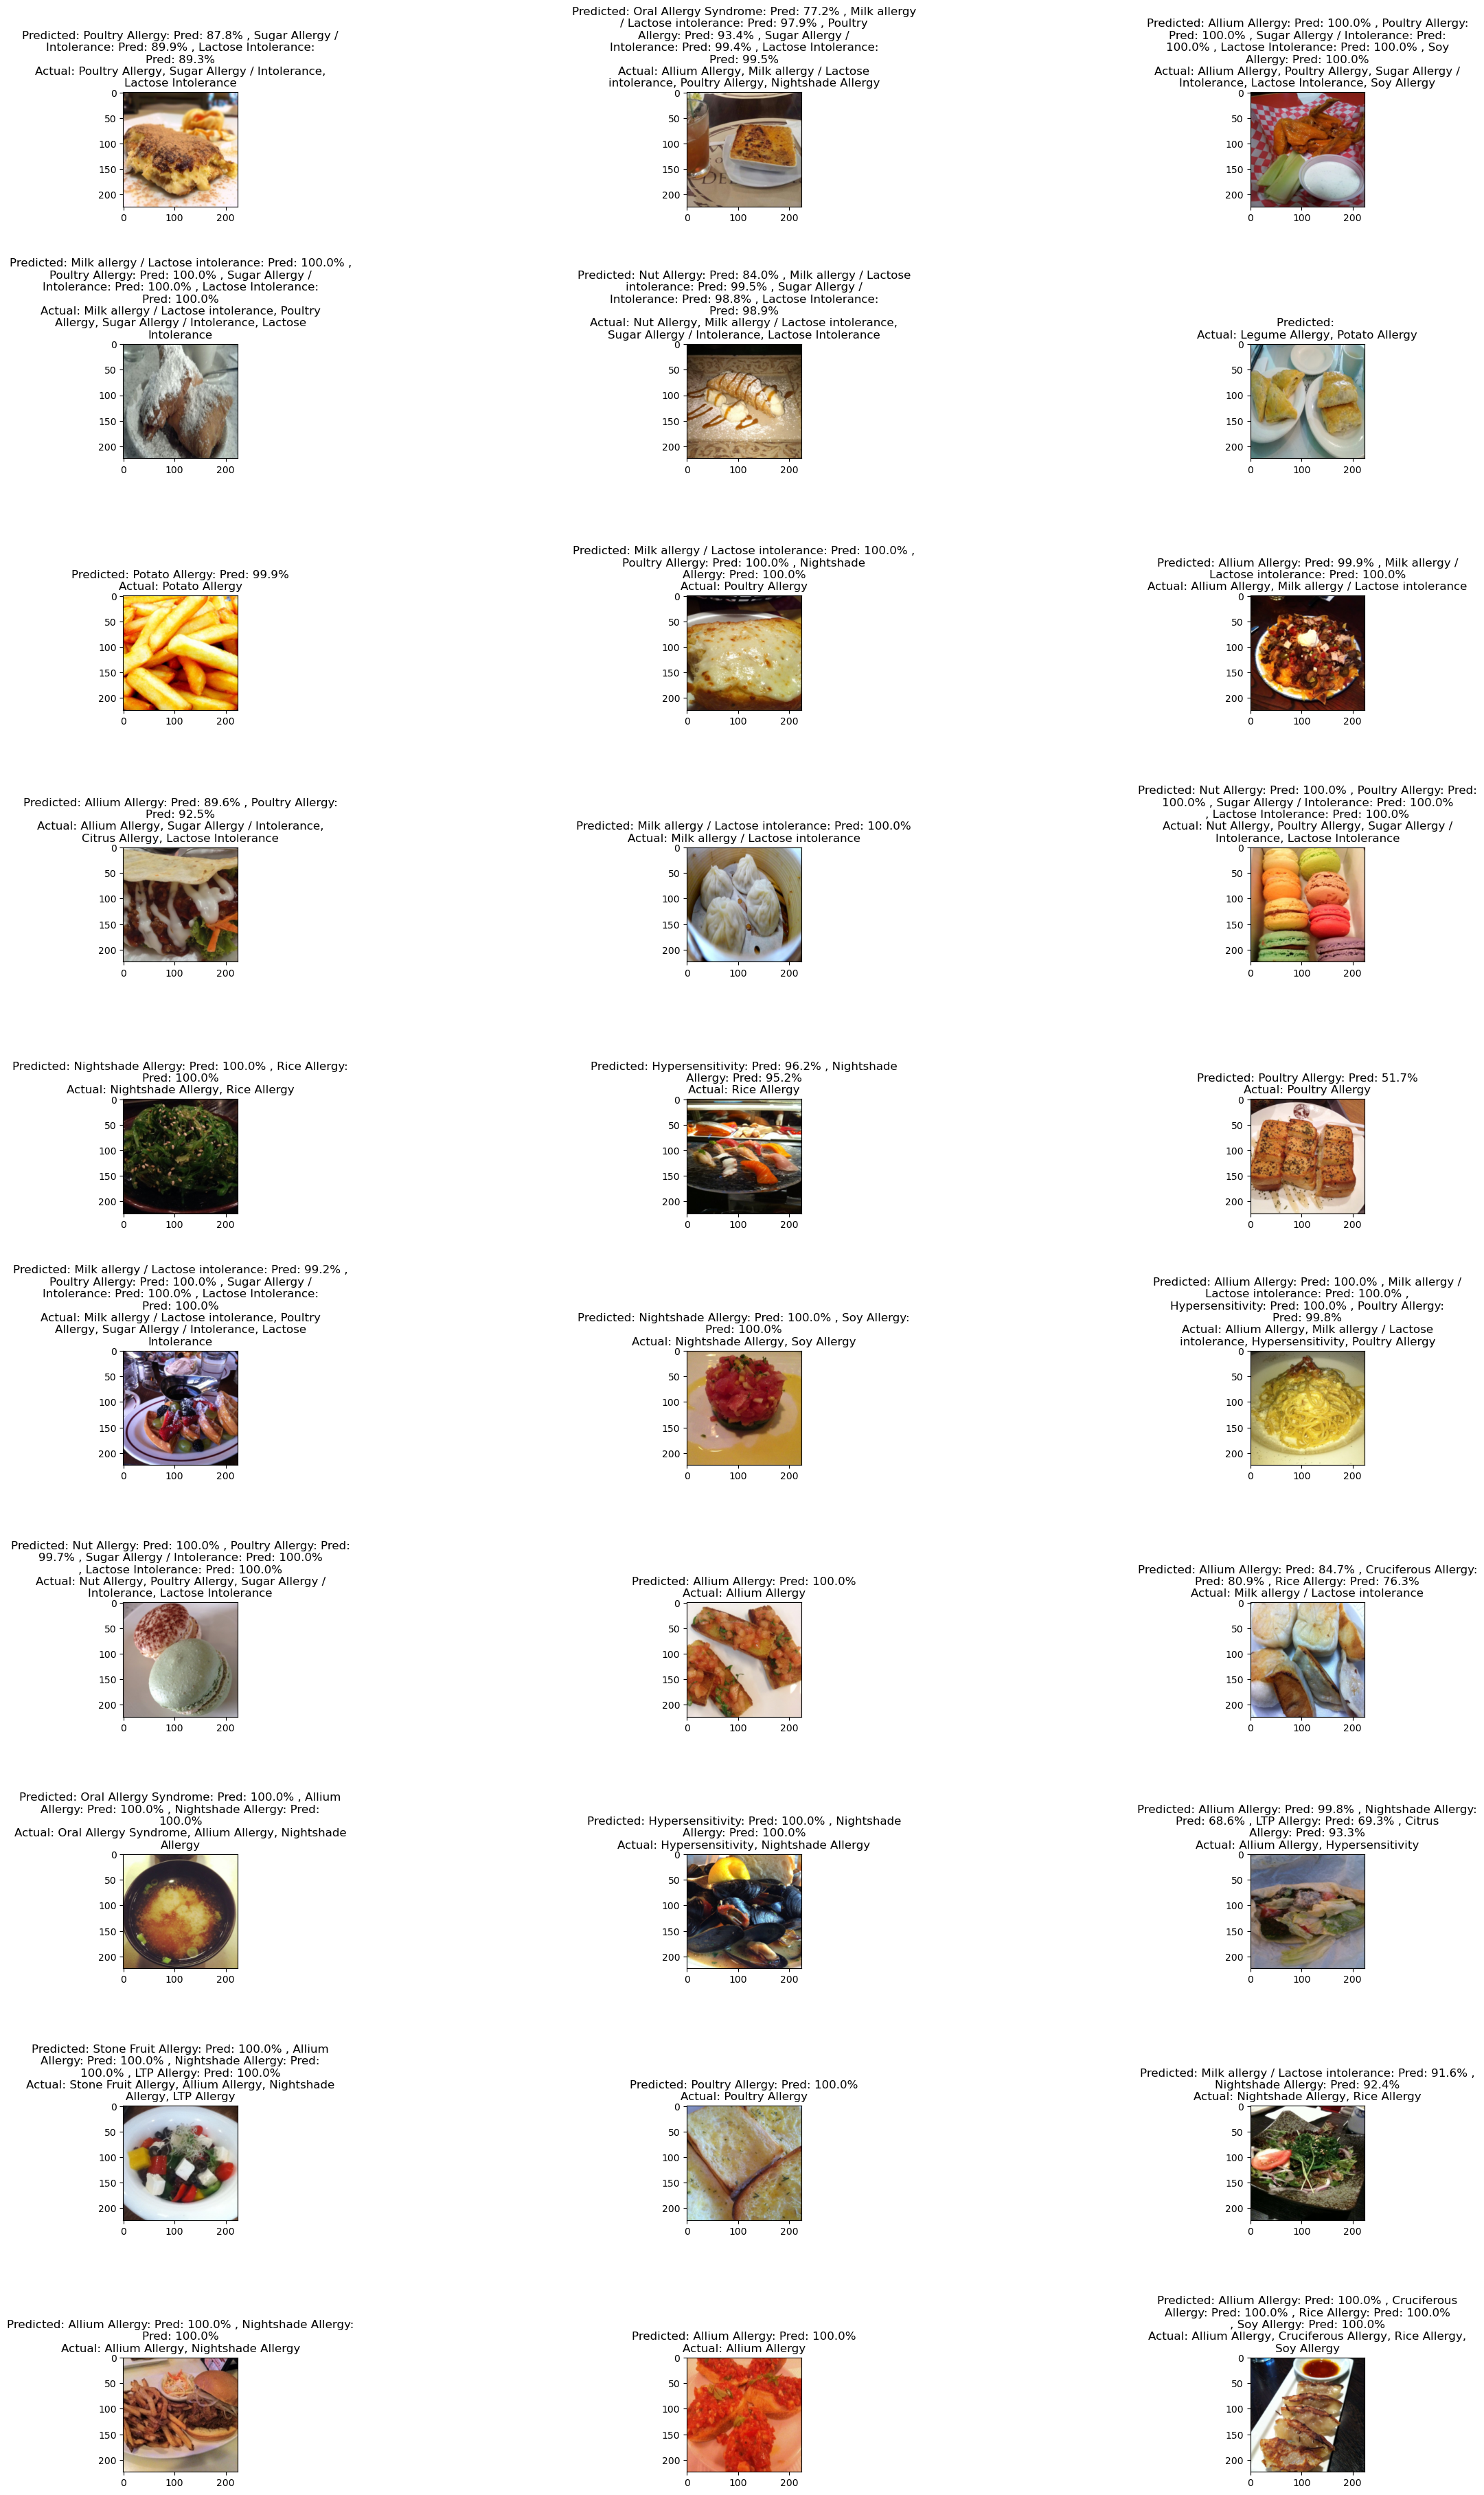

In [37]:
import matplotlib.pyplot as plt
import textwrap
inputs, targets = next(iter(test_loader))
inputs, targets = inputs.float().to(mps_device), targets.to(mps_device)

outputs = model(inputs)
fig, (m_axs) = plt.subplots(10, 3, figsize=(30, 45), gridspec_kw={'hspace': 1.2})
for i, c_ax in enumerate(m_axs.flatten()):
    pred_title = ', '.join(['{}: Pred: {:2.1f}%\n'.format(allergies[j], 100 * torch.sigmoid(outputs[i, j]).item())
                            for j, v in enumerate(outputs[i])
                            if torch.sigmoid(v) > 0.5])
    wrapped_pred = '\n'.join(textwrap.wrap(pred_title, width=50))

    act_title = ', '.join(['{}'.format(allergies[j]) for j, v in enumerate(targets[i]) if v == 1.0])
    wrapped_act = '\n'.join(textwrap.wrap(act_title, width=50))
    
    img = inputs[i].permute(1, 2, 0).cpu()
    c_ax.imshow(img)
    title = "Predicted: {}\nActual: {}".format(wrapped_pred, wrapped_act)
    c_ax.set_title(title)

In [38]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, classification_report

for param in model.parameters():
    param.requires_grad = False
model.eval()

true_labels = []
predicted_labels = []
model.eval()
with torch.no_grad():
    for images, labels in tqdm.tqdm(test_loader, desc='Testing'):
        images, labels = images.to(mps_device), labels.to(mps_device)
        predictions = model(images)
        
        binary_predictions = (predictions > 0.5).cpu().numpy().astype(int)
        
        predicted_labels.extend(binary_predictions)
        true_labels.extend(labels.cpu().numpy())
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

report = classification_report(true_labels, predicted_labels, target_names=allergies, zero_division=0)
print(report)

f1score_samples = f1_score(y_true=true_labels, y_pred=predicted_labels, average='samples')
f1score_macro = f1_score(y_true=true_labels, y_pred=predicted_labels, average='macro')
f1score_weighted = f1_score(y_true=true_labels, y_pred=predicted_labels, average='weighted')
recall = recall_score(y_true=true_labels, y_pred=predicted_labels, average='samples')
prec = precision_score(y_true=true_labels, y_pred=predicted_labels, average='samples')
hamming = hamming_score(y_true=true_labels, y_pred=predicted_labels)


accuracy = accuracy_score(true_labels, predicted_labels)
hl = hamming_loss(true_labels, predicted_labels)
print("Accuracy: ", accuracy)
print("F1 Samples: ", f1score_samples)
print("F1 Weighted: ", f1score_weighted)
print("Hamming score: ", hamming)
print("Hamming loss: ", hl)

Testing:   0%|          | 0/395 [00:00<?, ?it/s]

                                    precision    recall  f1-score   support

                       Nut Allergy       0.93      0.83      0.87       500
             Oral Allergy Syndrome       0.84      0.67      0.75      1500
               Stone Fruit Allergy       0.93      0.74      0.83       500
                    Allium Allergy       0.90      0.83      0.86     11000
                 Histamine Allergy       0.89      0.82      0.85      1250
                    Legume Allergy       0.87      0.71      0.78       750
                Salicylate Allergy       0.92      0.64      0.76       250
               Cruciferous Allergy       0.93      0.79      0.85       250
Milk allergy / Lactose intolerance       0.90      0.84      0.87     11250
                  Mushroom Allergy       0.85      0.72      0.78       500
                  Hypersensitivity       0.91      0.79      0.84      5000
                   Poultry Allergy       0.88      0.81      0.84     10000
           

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy:  0.6545742574257426
F1 Samples:  0.7889301127591751
F1 Weighted:  0.850092207401733
Hamming score:  0.7640349992142071
Hamming loss:  0.039603960396039604


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
torch.save(model.state_dict(), './resamplesk_ingredients101/allergies/FineTunedResNet_allergies_model.pth')